In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
db = pd.read_csv(r"C:\Users\Reks\Downloads\Phishing_Legitimate_full.csv\Phishing_Legitimate_full.csv")

In [4]:
db.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [9]:
db.columns

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks',
       'PctExtResourceUrls', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch',
       'FakeLinkInStatusBar', 'RightClickDisabled', 'PopUpWindow',
       'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle',
       'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT',
       'PctExtResourceUrlsRT', 'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT',
       'PctExtNullSelfRedirectHyperl

In [6]:
# To check categorical and numerical columns

cate_col = db.select_dtypes('float').columns

cate_col

Index(['PctExtHyperlinks', 'PctExtResourceUrls',
       'PctNullSelfRedirectHyperlinks'],
      dtype='object')

In [8]:
num_col = db.select_dtypes('int').columns
num_col

Index(['id', 'NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash',
       'NumDashInHostname', 'AtSymbol', 'TildeSymbol', 'NumUnderscore',
       'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash',
       'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress',
       'DomainInSubdomains', 'DomainInPaths', 'HttpsInHostname',
       'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath',
       'NumSensitiveWords', 'EmbeddedBrandName', 'ExtFavicon', 'InsecureForms',
       'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction',
       'FrequentDomainNameMismatch', 'FakeLinkInStatusBar',
       'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail',
       'IframeOrFrame', 'MissingTitle', 'ImagesOnlyInForm', 'SubdomainLevelRT',
       'UrlLengthRT', 'PctExtResourceUrlsRT', 'AbnormalExtFormActionR',
       'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT',
       'CLASS_LABEL'],
      dtype='object')

# check the target variable distribution

In [12]:
db['CLASS_LABEL'].value_counts()

# Equal distribution

1    5000
0    5000
Name: CLASS_LABEL, dtype: int64

In [10]:
# Summary

db.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# We can check correlation of columns with mutual info classifier and it can only be used for discrete features

from sklearn.feature_selection import mutual_info_classif as mic

In [15]:
train = db.drop(['id','CLASS_LABEL'], axis=1)
y = db['CLASS_LABEL']

In [16]:
discrete_features = train.dtypes == int

In [18]:
mi_scores = mic(train, y, discrete_features=discrete_features)
mi_scores = pd.Series(mi_scores, name='MI Scores', index=train.columns)
mi_scores = mi_scores.sort_values(ascending=False)
mi_scores

PctExtHyperlinks                      0.466283
PctExtResourceUrls                    0.294361
PctNullSelfRedirectHyperlinks         0.238315
PctExtNullSelfRedirectHyperlinksRT    0.220148
NumNumericChars                       0.135208
FrequentDomainNameMismatch            0.131756
ExtMetaScriptLinkRT                   0.124253
NumDash                               0.114425
SubmitInfoToEmail                     0.088723
NumDots                               0.062898
PathLevel                             0.054618
InsecureForms                         0.050325
PathLength                            0.048863
QueryLength                           0.043511
NumSensitiveWords                     0.041527
UrlLength                             0.039222
NumQueryComponents                    0.036177
PctExtResourceUrlsRT                  0.033526
IframeOrFrame                         0.030152
AbnormalExtFormActionR                0.024009
HostnameLength                        0.022468
IpAddress    

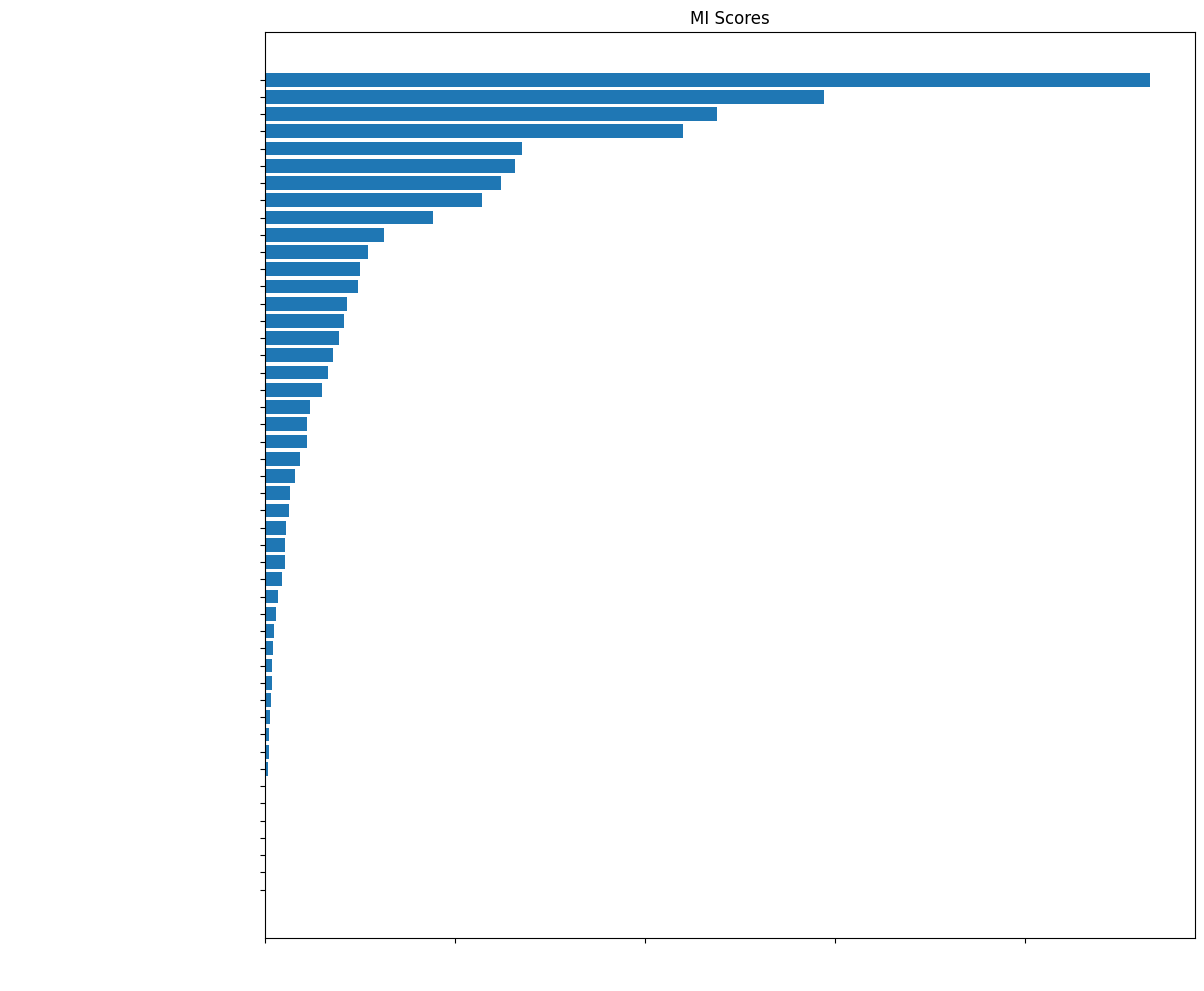

In [37]:
from turtle import color

# mi score function
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    ax = plt.barh(width, scores)
    plt.xlabel('mi_score',color = 'white')
    plt.xticks( color = 'white')
    plt.yticks(width, ticks,color='white')
    plt.title("MI Scores")
    
plt.figure(dpi=100, figsize=(12,12))
plot_mi_scores(mi_scores)


# we need to use the top features, which will give the best optimised score.

In [65]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [66]:
# Function to get optimized number of features by comparing precision, recall, F1 and accuracy

def train_Random_forest(data, top_n):
    top_n_features = mi_scores.sort_values(ascending=False).head(top_n).index.tolist()
    X = data[top_n_features]
    y = data['CLASS_LABEL']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    
    rfc = RFC(n_estimators=100,   
                max_depth=32, 
                max_features=1.0)
    
    rfc.fit(X_train, y_train)
    
    y_pred = rfc.predict(X_test)
    
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    return precision, recall, f1, accuracy

In [67]:
List1 = []
for i in range(20,51,1):
    precision, recall, f1, accuracy = train_Random_forest(db, i)
    print("Performance of Top {} features is precision : {}, recall : {}, f1 score : {}, accuracy : {}".format(i, precision, recall, f1, accuracy))
    List1.append([i, precision, recall, f1, accuracy])

Performance of Top 20 features is precision : 0.9760717846460618, recall : 0.9829317269076305, f1 score : 0.9794897448724361, accuracy : 0.9795
Performance of Top 21 features is precision : 0.9656912209889001, recall : 0.9795291709314228, f1 score : 0.9725609756097562, accuracy : 0.973
Performance of Top 22 features is precision : 0.9821251241310824, recall : 0.97534516765286, f1 score : 0.9787234042553192, accuracy : 0.9785
Performance of Top 23 features is precision : 0.977022977022977, recall : 0.9799599198396793, f1 score : 0.9784892446223111, accuracy : 0.9785
Performance of Top 24 features is precision : 0.9754098360655737, recall : 0.9724208375893769, f1 score : 0.9739130434782609, accuracy : 0.9745
Performance of Top 25 features is precision : 0.9815891472868217, recall : 0.9796905222437138, f1 score : 0.9806389157792836, accuracy : 0.98
Performance of Top 26 features is precision : 0.9751243781094527, recall : 0.9751243781094527, f1 score : 0.9751243781094527, accuracy : 0.975

In [56]:
top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
print(top_n_features)

['PctExtHyperlinks', 'PctExtResourceUrls', 'PctNullSelfRedirectHyperlinks', 'PctExtNullSelfRedirectHyperlinksRT', 'NumNumericChars', 'FrequentDomainNameMismatch', 'ExtMetaScriptLinkRT', 'NumDash', 'SubmitInfoToEmail', 'NumDots', 'PathLevel', 'InsecureForms', 'PathLength', 'QueryLength', 'NumSensitiveWords', 'UrlLength', 'NumQueryComponents', 'PctExtResourceUrlsRT', 'IframeOrFrame', 'AbnormalExtFormActionR', 'HostnameLength', 'IpAddress', 'NumPercent', 'NumUnderscore', 'NumDashInHostname', 'RightClickDisabled', 'NumAmpersand', 'UrlLengthRT', 'ExtFormAction', 'NumHash', 'AbnormalFormAction', 'RelativeFormAction']


In [68]:

df = pd.DataFrame(List1, columns=['num_of_features', 'precision', 'recall', 'f1_score', 'accuracy'])
df.head()

,num_of_features,precision,recall,f1_score,accuracy
0,20,0.976072,0.982932,0.979490,0.9795
1,21,0.965691,0.979529,0.972561,0.9730
2,22,0.982125,0.975345,0.978723,0.9785
3,23,0.977023,0.979960,0.978489,0.9785
4,24,0.975410,0.972421,0.973913,0.9745


Text(0, 0.5, 'performance_score')

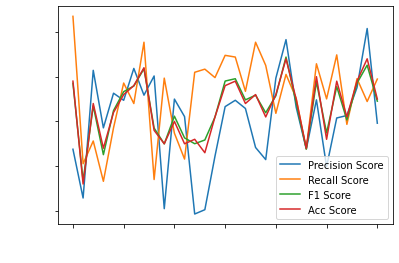

In [63]:
# Visualization of different performance scores

sns.lineplot(x='num_of_features', y='precision', data=df, label='Precision Score')
sns.lineplot(x='num_of_features', y='recall', data=df, label='Recall Score')
sns.lineplot(x='num_of_features', y='f1_score', data=df, label='F1 Score')
sns.lineplot(x='num_of_features', y='accuracy', data=df, label='Acc Score')
plt.xticks( color = 'white')
plt.yticks(color = 'white')
plt.xlabel('num_features',color = 'white')
plt.ylabel('performance_score', color = 'white')


In [59]:
# Model based on optimized number of features

top_n_features = mi_scores.sort_values(ascending=False).head(32).index.tolist()
X = db[top_n_features]
y = db['CLASS_LABEL']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

rfc = RFC(n_estimators=100, 
          
            max_depth=32, 
            
            max_features=1.0,
            )

rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test,)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Performance for RFC Model with precision : {}, recall : {}, f1 score : {}, accuracy : {}".format( precision, recall, f1, accuracy))

Performance for RFC Model with precision : 0.9756838905775076, recall : 0.9766734279918864, f1 score : 0.9761784085149517, accuracy : 0.9765


In [64]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1014
           1       0.98      0.98      0.98       986

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000

